# Regression

In [3]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

diet_data = pd.read_csv('data/diet_data.csv')
diet_data = diet_data.sample(frac=1).reset_index(drop=True)
diet_data = diet_data.dropna()
diet_data.head(10)

,Date,Stone,Pounds,Ounces,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
1,10/15/2018,12.0,3.0,0.0,2736.0,2300.0,0.84,1.0,1.0,0.0,0.0,0.0,1.0,-26.0
2,9/2/2018,12.0,1.0,6.0,2710.0,4600.0,1.70,0.0,0.0,0.0,1.0,0.0,0.0,14.0
3,10/13/2018,11.0,13.0,4.0,2676.0,4900.0,1.83,0.0,0.0,1.0,1.0,0.0,1.0,20.0
4,9/11/2018,11.0,13.0,4.0,2676.0,2100.0,0.78,0.0,1.0,0.0,0.0,1.0,1.0,-14.0
5,12/9/2018,12.0,4.0,6.0,2758.0,1400.0,0.51,0.0,0.0,1.0,0.0,0.0,1.0,-38.0
7,10/28/2018,12.0,0.0,0.0,2688.0,7550.0,2.81,0.0,0.0,0.0,1.0,0.0,0.0,64.0
8,8/23/2018,11.0,11.0,6.0,2646.0,2800.0,1.06,1.0,0.0,0.0,0.0,0.0,0.0,2.0
10,10/8/2018,12.0,0.0,4.0,2692.0,2200.0,0.82,1.0,1.0,0.0,0.0,0.0,0.0,-4.0
11,9/24/2018,12.0,1.0,2.0,2706.0,2400.0,0.89,0.0,1.0,0.0,0.0,1.0,1.0,-12.0
12,9/13/2018,11.0,12.0,4.0,2660.0,6300.0,2.37,1.0,1.0,0.0,1.0,1.0,1.0,18.0


Text(0, 0.5, 'change in weight')

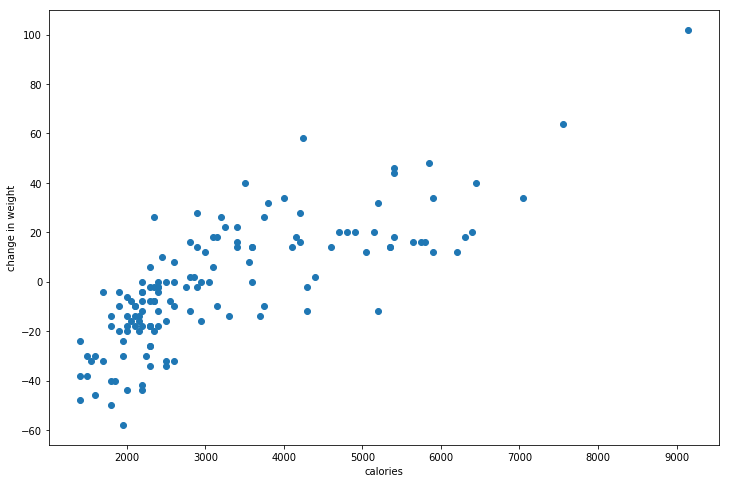

In [4]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(diet_data['calories'], diet_data['change'])
plt.xlabel('calories')
plt.ylabel('change in weight')

Text(0, 0.5, 'change in weight')

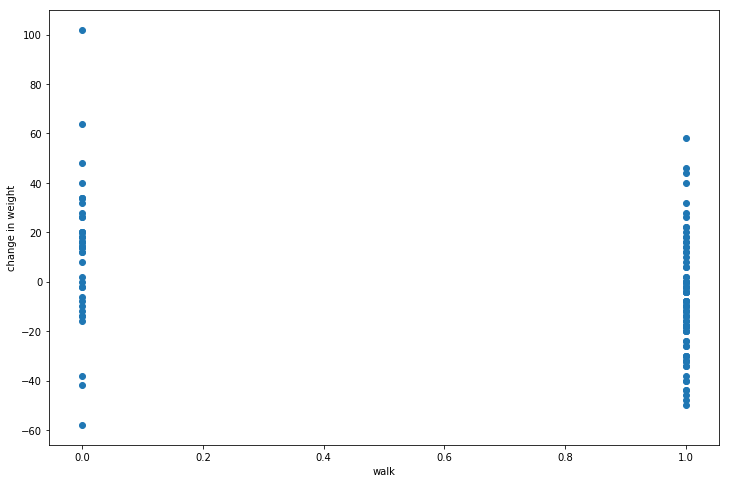

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(diet_data['walk'], diet_data['change'])
plt.xlabel('walk')
plt.ylabel('change in weight')

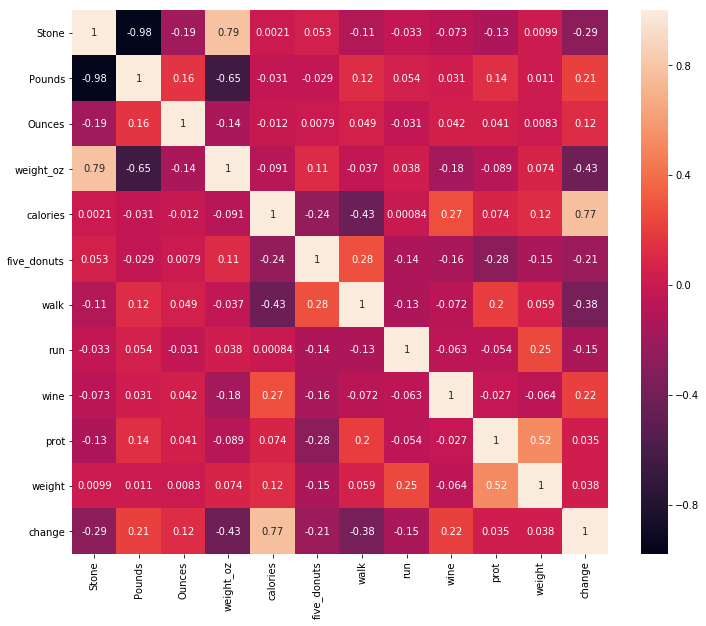

In [6]:
diet_data_corr = diet_data.corr()
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(diet_data_corr, annot=True)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

X = diet_data.drop(['change', 'Date', 'Stone', 'Pounds', 'Ounces'],axis=1)
Y = diet_data['change']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

mlp_reg = MLPRegressor(activation = 'relu',
                       hidden_layer_sizes= (1, ), 
                       solver='lbfgs', 
                       verbose=True,
                       max_iter=100)
mlp_reg.fit(x_train, y_train)
y_pred = mlp_reg.predict(x_test)
mlp_reg.score(x_train, y_train)

0.7225194234861677

In [9]:
r2_score(y_test, y_pred)

0.775411188672924

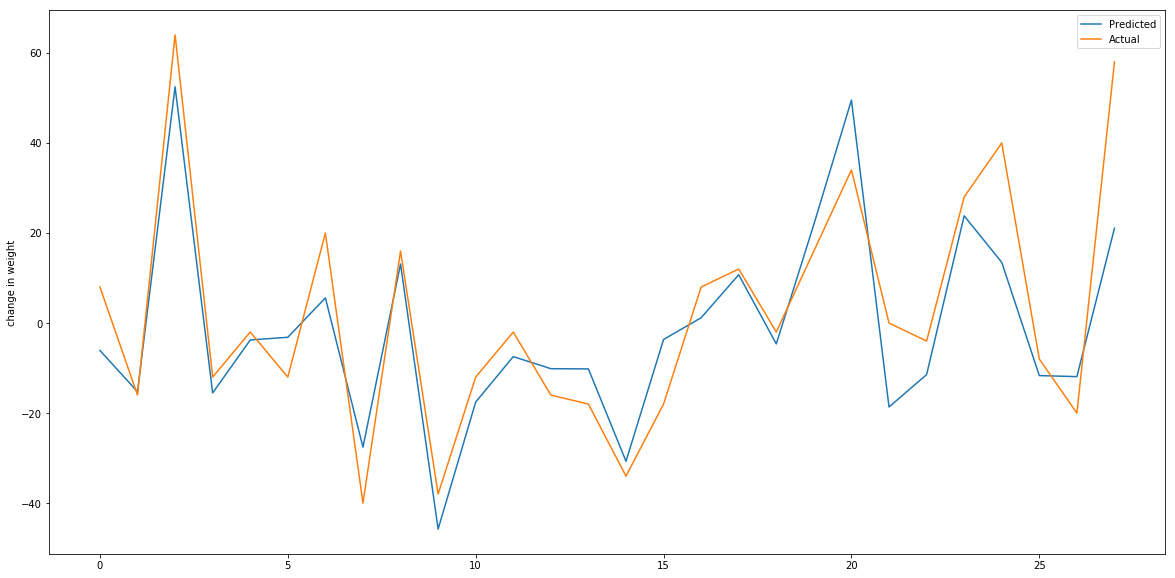

In [10]:
plt.figure(figsize = (20,10))
plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('change in weight')
plt.legend()
plt.show()

# Classification

In [11]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

spine_data = pd.read_csv('data/spine_data.csv',
                         skiprows=1,
                         names = ['pelvic_incidence',
                                  'pelvic tilt',
                                  'lumbar_lordosis_angle',
                                  'sacral_slope',
                                  'pelvic_radius',
                                  'degree_spondylolisthesis',
                                  'pelvic_slope',
                                  'direct_tilt',
                                  'thoracic_slope',
                                  'cervical_tilt',
                                  'sacrum_angle',
                                  'scoliosis_slope',
                                  'class'])
spine_data = spine_data.sample(frac=1).reset_index(drop=True)
spine_data.head(10)

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
0,96.657315,19.461581,90.211498,77.195734,120.673041,64.080998,0.623388,21.5013,13.0551,11.35399,-14.093301,20.8180,Abnormal
1,69.563486,15.401139,74.438497,54.162347,105.067356,29.701211,0.003220,13.3594,18.2659,15.38281,-2.504431,14.2555,Abnormal
2,72.076278,18.946176,51.000000,53.130102,114.213013,1.010041,0.084621,12.6031,9.6504,10.87581,-16.918585,14.0322,Abnormal
3,41.187770,5.792974,42.867392,35.394796,103.348880,27.660277,0.044130,21.0757,10.5374,9.66748,-9.571667,30.5253,Abnormal
4,39.087264,5.536602,26.932038,33.550662,131.584420,-0.759461,0.252512,26.2684,12.6508,12.36056,-34.071611,43.7183,Normal
5,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal
6,44.489275,21.786433,31.474154,22.702842,113.778494,-0.284129,0.547080,23.9247,13.4464,9.27506,-8.230224,15.5635,Normal
7,74.717228,14.321679,32.500000,60.395549,107.182218,37.017080,0.979253,25.3481,8.2316,12.17025,1.594477,31.4138,Abnormal
8,78.425951,33.425951,76.277439,45.000000,138.554111,77.155172,0.580604,36.6285,16.6264,7.96524,-19.123087,16.1431,Abnormal
9,82.905351,29.894119,58.250542,53.011232,110.708958,6.079338,0.827146,12.5622,12.3646,16.61754,-15.758791,35.9458,Normal


In [12]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()
spine_data['class'] = label_encoding.fit_transform(spine_data['class'].astype(str))
spine_data.sample(10)

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
146,36.157830,-0.810514,33.627314,36.968344,135.936910,-2.092507,0.332027,10.4752,17.1414,13.60366,-12.162522,28.3449,1
237,66.285394,26.327845,47.500000,39.957549,121.219684,-0.799624,0.647626,9.0466,10.2636,13.50349,1.138079,34.3683,0
8,78.425951,33.425951,76.277439,45.000000,138.554111,77.155172,0.580604,36.6285,16.6264,7.96524,-19.123087,16.1431,0
101,69.626283,21.122751,52.766595,48.503532,116.803091,54.816867,0.286894,18.5916,15.4963,15.92252,1.320769,34.8665,0
174,56.668293,13.458203,43.769710,43.210089,93.692209,21.108121,0.524781,8.0015,18.1719,15.03453,-16.408583,33.2835,0
62,86.041280,38.750670,47.871405,47.290610,122.092954,61.988277,0.035210,27.5499,12.0080,9.62750,5.603229,36.2899,0
15,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,0
304,60.753894,15.753894,43.199158,45.000000,113.053331,31.693548,0.822345,26.2469,17.3268,12.46333,-17.516477,22.9375,0
73,65.755679,9.832874,50.822895,55.922805,104.394959,39.307212,0.081033,35.6242,7.4483,12.13128,-5.163605,43.2649,0
253,64.809541,15.174078,58.839994,49.635463,111.679961,21.407198,0.303206,25.2382,7.1750,10.20296,-33.025711,17.1654,0


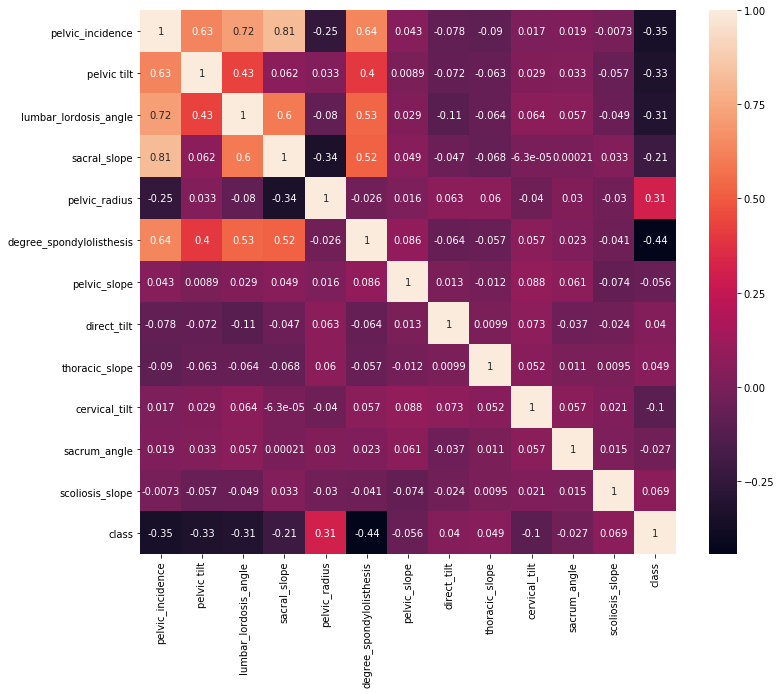

In [14]:
spine_data_corr = spine_data.corr()
spine_data_corr

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(spine_data_corr, annot=True)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

X = spine_data.drop('class', axis=1)
Y = spine_data['class']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.20)

mlp_clf = MLPClassifier(hidden_layer_sizes=(10, ), 
                    max_iter=100, 
                    activation = 'relu',
                    alpha=0.0001,
                    solver='lbfgs', 
                    verbose=True)
mlp_clf.fit(x_train, y_train)
y_pred = mlp_clf.predict(x_test)
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred})
pred_results.sample(10)

,y_test,y_pred
229,0,0
109,0,0
261,1,0
29,0,0
103,1,0
228,1,0
231,0,0
122,1,0
66,1,0
227,0,0


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

accuracy_score(y_test, y_pred)